In [1]:
import os
import cv2
import shutil
import numpy as np
from keras.utils import np_utils

# np.random.seed(10)

train_len = 480
test_len = 120

im_size = 256
train_data = np.empty((train_len*50,im_size,im_size,3))
test_data = np.empty((test_len*50,im_size,im_size,3))
train_label = np.reshape([[i]*train_len for i in range(50)],(-1))
test_label = np.reshape([[i]*test_len for i in range(50)],(-1))
train_label = np_utils.to_categorical(train_label, 50)
test_label = np_utils.to_categorical(test_label, 50)


original_name = '/media/dl-box/Research_kanayama/kimurasoturon/同画像/train_data_256origin_4/'

s = os.listdir(original_name)
c = 0
for i in range(len(s)):
    m = os.listdir(original_name + str(s[i]))
    for k in range(len(m)):
        fname = original_name + str(s[i]) + '/' + m[k]
#         im = cv2.resize(cv2.imread(fname), dsize=(im_size,im_size)) / 255
        im = cv2.imread(fname)/ 255
        train_data[c,:,:,:] = im[:,:,[2, 1, 0]]
        c += 1
X_train = train_data
Y_train = train_label

original_name2 = '/media/dl-box/Research_kanayama/kimurasoturon/同画像/test_data_256origin/'

t = os.listdir(original_name2)

d = 0
for i in range(len(t)):
    m = os.listdir(original_name2 + str(t[i]))
    for k in range(len(m)):
        fname = original_name2 + str(t[i]) + '/' + m[k]
#         im = cv2.resize(cv2.imread(fname), dsize=(im_size,im_size)) / 255
        im = cv2.imread(fname)/ 255
        test_data[d,:,:,:] = im[:,:,[2, 1, 0]]
        d += 1

Using TensorFlow backend.


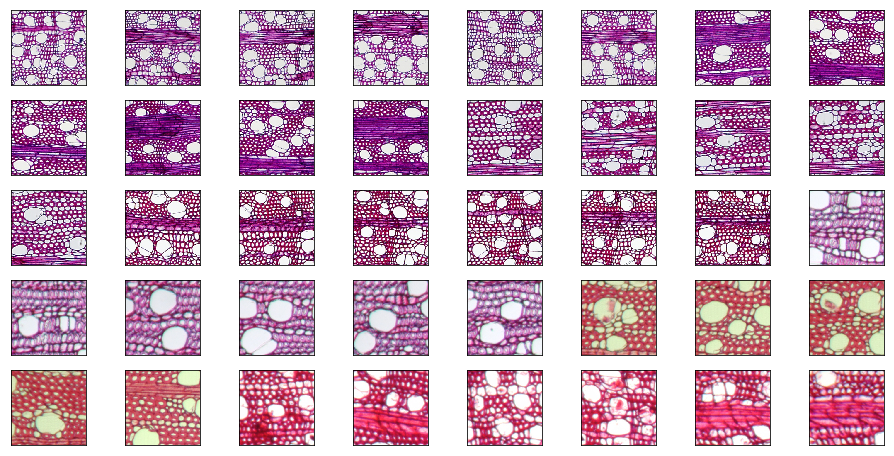

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

c = 0                                                    # subplot表示用のカウンター
plt.figure(figsize=(16, 8))                              # 表示するサイズを指定(何でもok)
for i in range(40):              # 160枚の訓練画像を表示
    c += 1
    plt.subplot(5,8,c)
    plt.tick_params(labelbottom=False, bottom=False)     #軸の消去
    plt.tick_params(labelleft=False, left=False)
    plt.imshow(test_data[i])
plt.show()

In [4]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline


model = build_model()
cb = EarlyStopping(monitor='val_loss', # testデータの損失が減らなくなった時に処理を中断する(Early Stopping)
                   min_delta=0.01,     # 10epoch経過しても0.01の差も改善しなくなった瞬間に中断
                   patience=10,
                   verbose=1,          # Early Stopping時に表示
                   mode='auto',
                   restore_best_weights=True # 最も良かった時の重みをmodelの持つ重みとする
                   )
history = model.fit(x = train_data,                            # 訓練データ
                         y = train_label,                           # 訓練ラベル
                         validation_data = [test_data, test_label], # 検証用データ&ラベル
                         batch_size = 256,                          # 一度に処理する枚数(重みの更新を行う枚数)
                         epochs = 100,                               # 最大何エポックまで学習するか
                         callbacks = [cb],                          # (今回は) Early Stoppingの呼び出し
                         verbose = 1,                               # 学習の過程を表示=1
                         shuffle = True                             # 学習データをシャッフルする
                         )
loss = history.history['loss']                                      # 各エポックごとの訓練損失
acc = history.history['acc']                                        # 各エポックごとの訓練正解率
val_loss = history.history['val_loss']                              # 各エポックごとの検証損失
val_acc = history.history['val_acc']                                # 各エポックごとの検証正解率
Epoch = len(history.history['val_loss'])                            # 学習したエポック数
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.plot(np.arange(1, Epoch+1, 1), loss, linestyle = ':', color = 'black', label='train_loss') # 訓練損失のグラフ
plt.plot(np.arange(1, Epoch+1, 1), val_loss, linestyle = '-', color = 'red', label='val_loss') # 検証損失のグラフ
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()                      # 凡例
plt.xlim([1, Epoch + 1])          # x軸の表示範囲
xtick = np.arange(0, Epoch+1, 5)  # x軸の目盛り(5間隔)
xtick[0] = 1                      # x軸の目盛りの初期値を0→1に変更
plt.xticks(xtick)                 # x軸の目盛りを設定
plt.subplot(1,2,2)
plt.plot(np.arange(1, Epoch+1, 1), acc, linestyle = ':', color = 'black', label='train_acc') # 訓練正解率のグラフ
plt.plot(np.arange(1, Epoch+1, 1), val_acc, linestyle = '-', color = 'red', label='val_acc') # 検証正解率のグラフ
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.xlim([1, Epoch + 1])
xtick = np.arange(0, Epoch+1, 5)
xtick[0] = 1   
plt.xticks(xtick)

best_ep = np.argmin(np.array(val_loss), axis=0)              # 検証損失が最小の時のepoch
best_acc = np.round(np.array(val_acc)[best_ep], decimals=2)  # そのときの正解率

print('Best model: epoch=' + str(best_ep+1) + ' & val_acc: ' + str(best_acc) + '\n')
plt.show()

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 78s 3ms/step - loss: 3.9149 - acc: 0.0181 - val_loss: 3.9112 - val_acc: 0.0198
Epoch 2/100
24000/24000 [==============================] - 70s 3ms/step - loss: 3.9116 - acc: 0.0208 - val_loss: 3.9123 - val_acc: 0.0200
Epoch 3/100
24000/24000 [==============================] - 70s 3ms/step - loss: 3.9127 - acc: 0.0200 - val_loss: 3.9122 - val_acc: 0.0200
Epoch 4/100
 4352/24000 [====>.........................] - ETA: 48s - loss: 3.9121 - acc: 0.0214

KeyboardInterrupt: 

In [3]:
# 32 最良モデル
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D, LocallyConnected2D
from keras.backend import tensorflow_backend as backend
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline


def build_model():

    model = Sequential()
    
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu', input_shape=(32, 32, 3)))
    
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(64,
                   kernel_regularizer=regularizers.l2(0.00001),
                   activity_regularizer=regularizers.l1(0.0000001)))
    model.add(Dropout(0.5))

    model.add(Dense(train_label.shape[1], activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

    return model

In [3]:
# 64 最良モデル
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D, LocallyConnected2D
from keras.backend import tensorflow_backend as backend
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline


def build_model():

    model = Sequential()
    
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu', input_shape=(64, 64, 3)))
    
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    
    model.add(Dense(64,
                   kernel_regularizer=regularizers.l2(0.00001),
                   activity_regularizer=regularizers.l1(0.0000001)))
    model.add(Dropout(0.5))

    model.add(Dense(train_label.shape[1], activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

    return model

In [3]:
# 128 最良モデル
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D, LocallyConnected2D
from keras.backend import tensorflow_backend as backend
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline


def build_model():

    model = Sequential()
    
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu', input_shape=(128, 128, 3)))
    
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    
    model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    
    model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64,
                   kernel_regularizer=regularizers.l2(0.000001),
                   activity_regularizer=regularizers.l1(0.0000001)))
    model.add(Dropout(0.5))

    model.add(Dense(train_label.shape[1], activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

    return model

In [3]:
# 256 最良モデル
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D, LocallyConnected2D
from keras.backend import tensorflow_backend as backend
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline


def build_model():

    model = Sequential()
    
    model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same',
                     activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    
    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))

    model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    
    model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
        
    model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64,
                   kernel_regularizer=regularizers.l2(0.000001),
                   activity_regularizer=regularizers.l1(0.0000001)))
    model.add(Dropout(0.5))

    model.add(Dense(train_label.shape[1], activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

    return model

In [3]:
from keras import regularizers
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU
from keras.initializers import he_uniform

def build_model():
    
    # name model
    model = Sequential()

    # Conv(filter,(stride,stride))
    # padding(same) = zero padding
    # number of layer ①
    model.add(Conv2D(32, (3, 3), padding='same',
                           activation='relu', input_shape=(256, 256, 3)))

    # ②
    model.add(Conv2D(32, (3, 3), padding='same',
                          activation='relu'))
    model.add(MaxPooling2D(2, 2))

    # ③
    model.add(Conv2D(64, (3, 3), padding='same',
                           activation='relu'))

    # ④
    model.add(Conv2D(64, (3, 3), padding='same',
                           activation='relu'))
    model.add(MaxPooling2D(2, 2))

    # ⑤
    model.add(Conv2D(128, (3, 3), padding='same',
                           activation='relu'))

    # ⑥
    model.add(Conv2D(128, (3, 3), padding='same',
                           activation='relu'))
    model.add(MaxPooling2D(2, 2))

    # ⑦
    model.add(Flatten())

    # ⑧
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    # ⑨ softmax:probability
    model.add(Dense(train_label.shape[1], activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

    # algorithm=stochastic gradient descent(SGD) 
    # lr=learning-rate:学習率, decay=learning-decay:学習率減衰
    # momentum:今までの動きを考慮することでSGDの振動を抑える
    # nesterov:未来のパラメーターの推定位置を計算することで効果的に予測し、SGDの速度を上げる
#     sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
#     model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [4]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
all_loss=[]
all_val_loss=[]
all_acc=[]
all_val_acc=[]
# ep=40  #32
# ep=30  #64
ep=25  #128,256
c = 1
for train_index, val_index in kf.split(X_train,Y_train):
    print('クロスバリデーション' + str(c) + '回目')
    c += 1
    train_data=X_train[train_index]
    train_label=Y_train[train_index]
    val_data=X_train[val_index]
    val_label=Y_train[val_index]
    model=build_model()
    history=model.fit(train_data,
                      train_label,
                      epochs=ep,
                      batch_size=256,
                      validation_data=(val_data,val_label))
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    
    all_loss.append(loss)
    all_val_loss.append(val_loss)
    all_acc.append(acc)
    all_val_acc.append(val_acc)
    
model.summary()
ave_all_loss=[
    np.mean([x[i] for x in all_loss]) for i in range(ep)]
ave_all_val_loss=[
    np.mean([x[i] for x in all_val_loss]) for i in range(ep)]
ave_all_acc=[
    np.mean([x[i] for x in all_acc]) for i in range(ep)]
ave_all_val_acc=[    
    np.mean([x[i] for x in all_val_acc]) for i in range(ep)]

クロスバリデーション1回目
Train on 21600 samples, validate on 2400 samples
Epoch 1/25
21600/21600 [==============================] - 65s 3ms/step - loss: 3.8729 - acc: 0.0278 - val_loss: 3.7538 - val_acc: 0.0604
Epoch 2/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.7061 - acc: 0.0502 - val_loss: 3.5827 - val_acc: 0.0592
Epoch 3/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.6066 - acc: 0.0632 - val_loss: 3.4721 - val_acc: 0.0787
Epoch 4/25
21600/21600 [==============================] - 57s 3ms/step - loss: 3.4641 - acc: 0.0889 - val_loss: 3.3496 - val_acc: 0.1096
Epoch 5/25
21600/21600 [==============================] - 57s 3ms/step - loss: 3.3297 - acc: 0.1075 - val_loss: 3.0901 - val_acc: 0.1608
Epoch 6/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.1255 - acc: 0.1476 - val_loss: 2.9255 - val_acc: 0.2112
Epoch 7/25
21600/21600 [==============================] - 58s 3ms/step - loss: 2.9297 - acc: 0.1949 - val_loss: 2.6

21600/21600 [==============================] - 58s 3ms/step - loss: 3.9125 - acc: 0.0179 - val_loss: 3.9141 - val_acc: 0.0158
Epoch 18/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.9123 - acc: 0.0187 - val_loss: 3.9145 - val_acc: 0.0167
Epoch 19/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.9125 - acc: 0.0196 - val_loss: 3.9143 - val_acc: 0.0150
Epoch 20/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.9124 - acc: 0.0199 - val_loss: 3.9144 - val_acc: 0.0171
Epoch 21/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.9124 - acc: 0.0205 - val_loss: 3.9144 - val_acc: 0.0150
Epoch 22/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.9124 - acc: 0.0195 - val_loss: 3.9146 - val_acc: 0.0187
Epoch 23/25
21600/21600 [==============================] - 58s 3ms/step - loss: 3.9124 - acc: 0.0209 - val_loss: 3.9144 - val_acc: 0.0158
Epoch 24/25
21600/21600 [=====================

21600/21600 [==============================] - 61s 3ms/step - loss: 3.0325 - acc: 0.1672 - val_loss: 2.8728 - val_acc: 0.2033
Epoch 9/25
21600/21600 [==============================] - 61s 3ms/step - loss: 2.8685 - acc: 0.1981 - val_loss: 2.6537 - val_acc: 0.2608
Epoch 10/25
21600/21600 [==============================] - 61s 3ms/step - loss: 2.6803 - acc: 0.2447 - val_loss: 2.4462 - val_acc: 0.3117
Epoch 11/25
21600/21600 [==============================] - 61s 3ms/step - loss: 2.5352 - acc: 0.2769 - val_loss: 2.3396 - val_acc: 0.3204
Epoch 12/25
21600/21600 [==============================] - 61s 3ms/step - loss: 2.3662 - acc: 0.3174 - val_loss: 2.2108 - val_acc: 0.3563
Epoch 13/25
21600/21600 [==============================] - 61s 3ms/step - loss: 2.2581 - acc: 0.3429 - val_loss: 2.0861 - val_acc: 0.3779
Epoch 14/25
21600/21600 [==============================] - 61s 3ms/step - loss: 2.1360 - acc: 0.3788 - val_loss: 1.9717 - val_acc: 0.4058
Epoch 15/25
21600/21600 [======================

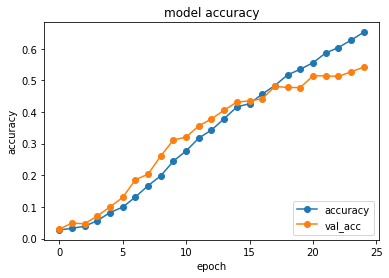

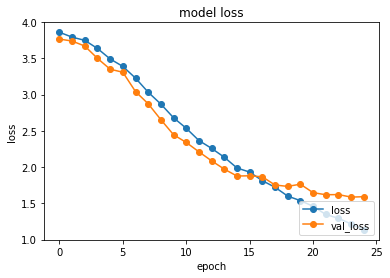

In [5]:
import matplotlib.pyplot as plt
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
    
plot_history(history)

In [6]:
model.evaluate(test_data, test_label)[1]

6000/6000 [==============================] - 11s 2ms/step


0.5245

In [7]:
import pandas as pd

df = pd.DataFrame({'ave_all_loss': ave_all_loss, 'ave_all_val_loss': ave_all_val_loss, 'ave_all_acc': ave_all_acc, 'ave_all_val_acc': ave_all_val_acc})
df.to_csv('256origins_.csv')

In [8]:
model.save('256origin_s.h5')

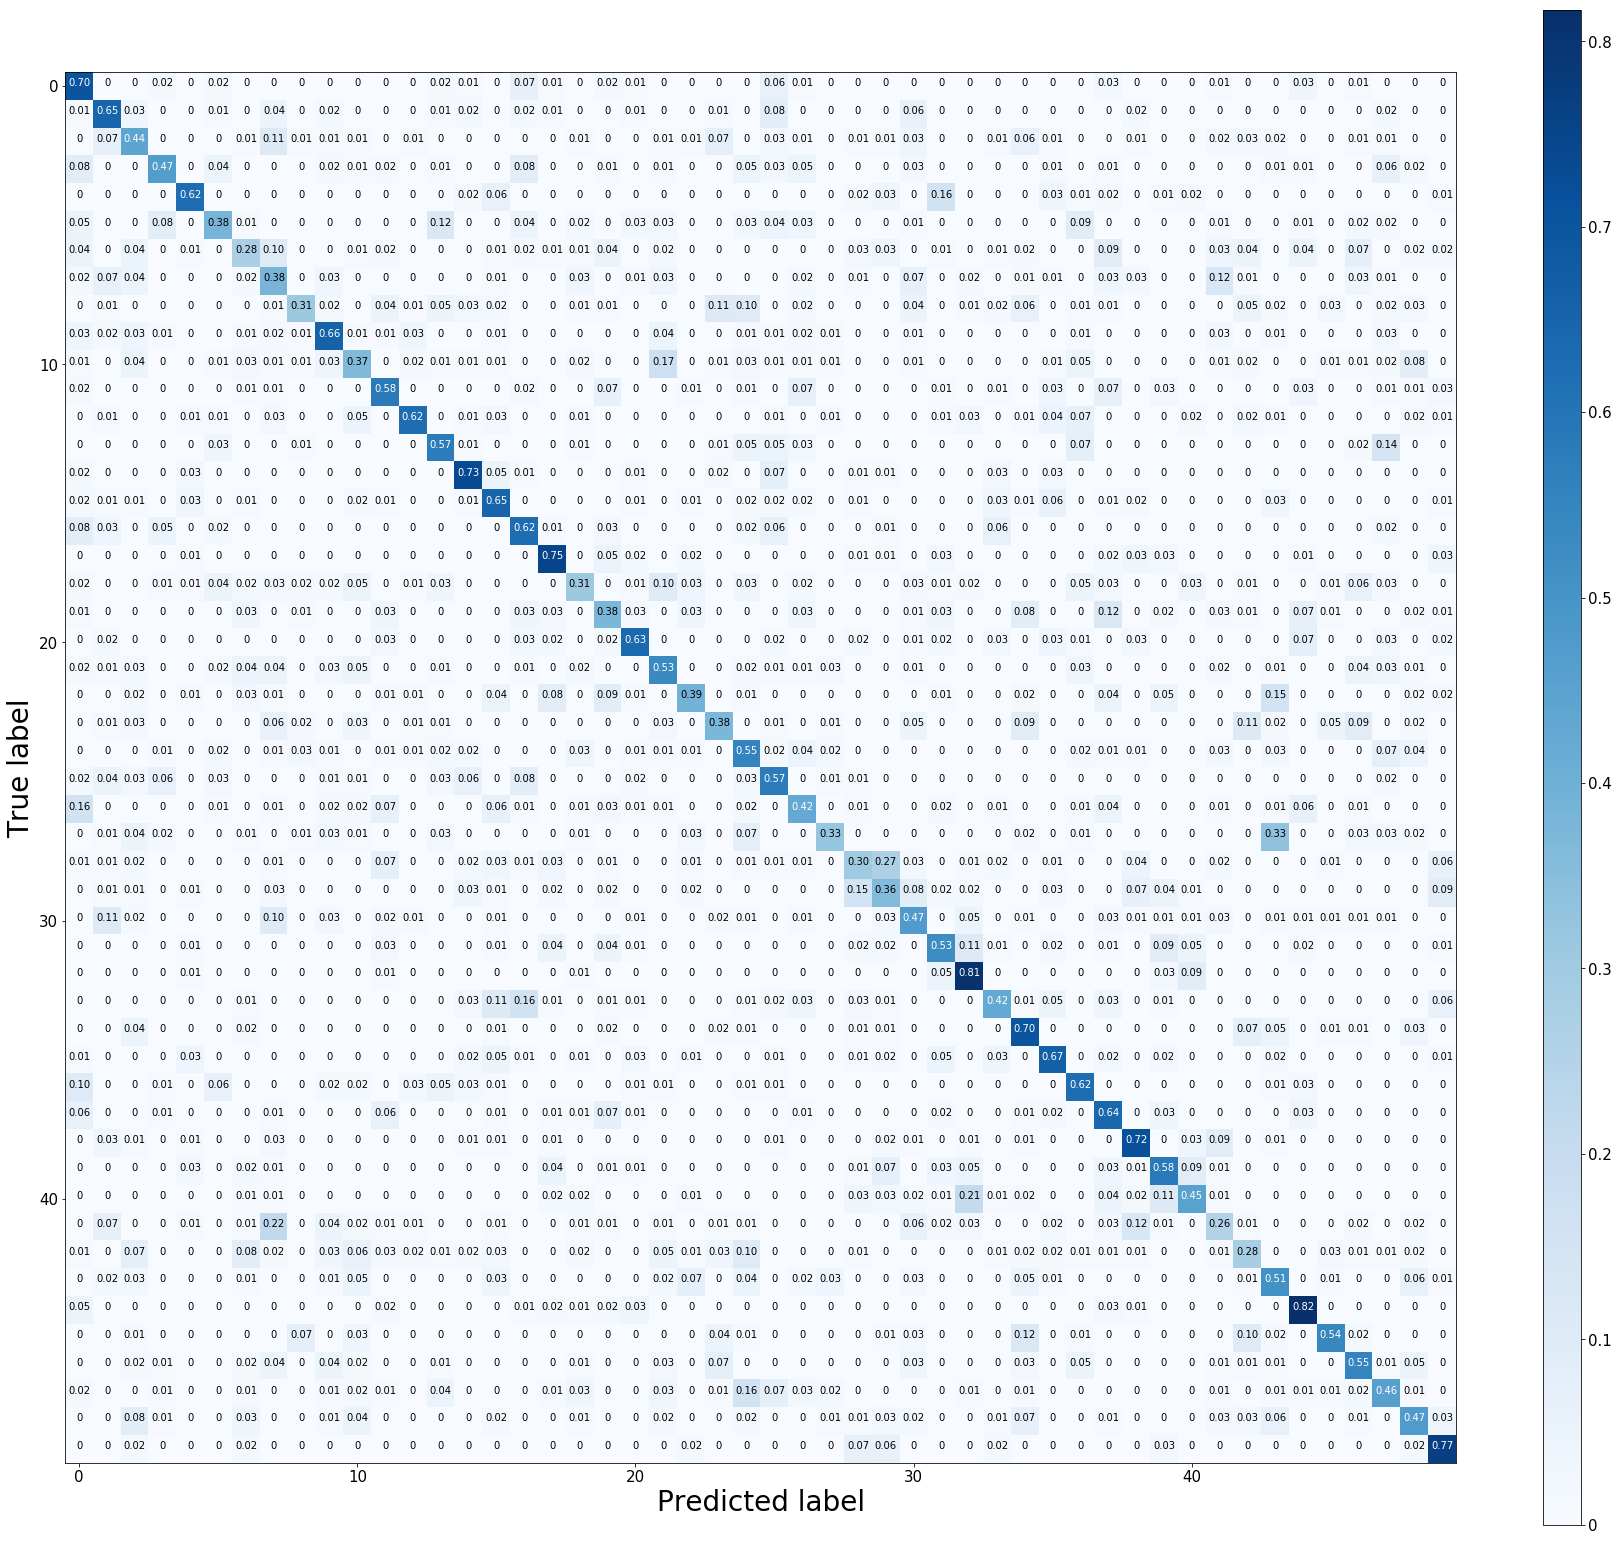

In [9]:
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score
# 有効桁数を下2桁とする
np.set_printoptions(precision=2)

num = []
num_true = []
y_pred = model.predict(test_data)
y_true = test_label

for i in range(len(y_pred)):
    l = np.argmax(y_pred[i])
    num.append(l)

for i in range(len(y_true)):
    l = np.argmax(y_true[i])
    num_true.append(l)
cnf_matrix=confusion_matrix(num_true,num)

# confusion matrixのプロット、保存、表示'
cmap=plt.cm.Blues
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(25, 25))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
fmt = '.2f' #if normalize == True else '.0f'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if cnf_matrix[i, j] == 0:
        plt.text(j, i, format(cnf_matrix[i, j], '.0f'),
                    horizontalalignment="center",
                    color="white" if cnf_matrix[i, j] > thresh else "black"
                    )
    else:
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cnf_matrix[i, j] > thresh else "black"
                    )
plt.tick_params(labelsize=15)
plt.ylabel('True label', fontsize=28)
plt.xlabel('Predicted label', fontsize=28)
plt.grid(False)
plt.tight_layout()
cbar = plt.colorbar(aspect=40, shrink=0.88)
cbar_label = list(np.round(np.linspace(0, 1, num=11), decimals=1))
cbar_label[0] = int(0)
cbar_label[-1] = int(1)
cbar.set_ticks(cbar_label)
cbar.set_ticklabels(cbar_label)
cbar.ax.tick_params(labelsize=15)
plt.savefig('256origin_s')

In [10]:
import pandas as pd
import numpy as np
import cv2
from keras import backend as K
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import load_model

K.set_learning_phase(1) #set learning phase



def Grad_Cam(input_model, x, layer_name):
    '''
    Args:
       input_model: モデルオブジェクト
       x: 画像(array)
       layer_name: 畳み込み層の名前

    Returns:
       jetcam: 影響の大きい箇所を色付けした画像(array)

    '''

    # 前処理
    X = np.expand_dims(x, axis=0)

    X = X.astype('float32')
    preprocessed_input = X / 255.0


    # 予測クラスの算出

    predictions = model.predict(preprocessed_input)
    class_idx = np.argmax(predictions[0])
    class_output = model.output[:, class_idx]


    #  勾配を取得

    conv_output = model.get_layer(layer_name).output   # layer_nameのレイヤーのアウトプット
    grads = K.gradients(class_output, conv_output)[0]  # gradients(loss, variables) で、variablesのlossに関しての勾配を返す
    gradient_function = K.function([model.input], [conv_output, grads])  # model.inputを入力すると、conv_outputとgradsを出力する関数

    output, grads_val = gradient_function([preprocessed_input])
    output, grads_val = output[0], grads_val[0]

    # 重みを平均化して、レイヤーのアウトプットに乗じる
    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)


    # 画像化してヒートマップにして合成

    cam = cv2.resize(cam, (im_size, im_size), cv2.INTER_LINEAR) # 画像サイズは200で処理したので
    cam = np.maximum(cam, 0) 
    cam = cam / cam.max()

    jetcam = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)  # モノクロ画像に疑似的に色をつける
    jetcam = cv2.cvtColor(jetcam, cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    jetcam = (np.float32(jetcam) + x / 2)   # もとの画像に合成

    return jetcam

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

a = '256origin_s'
if not os.path.exists(a) == True:
    os.mkdir(a)
original_name3 = '/media/dl-box/Research_kanayama/kimurasoturon/同画像/test_data_256origin/'
t_1 = os.listdir(original_name3)
for i in range(len(t_1)):
    m_1 = os.listdir(original_name3 + str(t_1[i]))
    for k in range(1):
        fname_1 = original_name3 + str(t_1[i]) + '/' + m_1[k]
        x = img_to_array(load_img(fname_1, target_size=(im_size,im_size)))
        image = Grad_Cam(model, x, 'conv2d_50') 
        b = array_to_img(image)
        b.save('./' + a + '/output' + str(i) + '.jpg')

In [12]:
import os
import cv2
import shutil
import numpy as np
from keras.utils import np_utils


im_size = 256
new_data = np.empty((50,im_size,im_size,3))
new_label = np.reshape([[i] for i in range(50)],(-1))
new_label = np_utils.to_categorical(test_label, 50)
original_name4 = './' + a + '/'
t = os.listdir(original_name4)
d = 0
for k in range(len(t)):
    fname = original_name4 + t[k]
    im = cv2.imread(fname)/ 255
    new_data[d,:,:,:] = im[:,:,[2, 1, 0]]
    d += 1

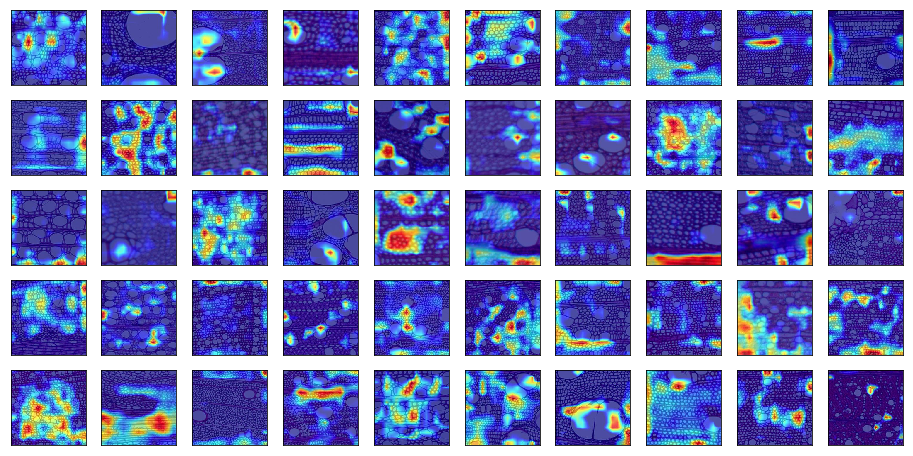

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

c = 0                                                    # subplot表示用のカウンター
plt.figure(figsize=(16, 8))                              # 表示するサイズを指定(何でもok)
for i in range(50):              # 160枚の訓練画像を表示
    c += 1
    plt.subplot(5,10,c)
    plt.tick_params(labelbottom=False, bottom=False)     #軸の消去
    plt.tick_params(labelleft=False, left=False)
    plt.imshow(new_data[i])
    
plt.savefig('256origin__s.png')
plt.show()

In [20]:
print(model.predict(test_data)[0])

[3.70e-03 1.28e-07 4.18e-10 3.96e-05 2.05e-07 5.61e-05 1.83e-04 9.25e-09
 1.29e-07 1.00e-09 1.61e-07 4.48e-03 1.34e-07 2.00e-06 1.59e-07 1.44e-08
 3.55e-05 5.92e-05 3.06e-06 1.00e-02 3.33e-02 2.03e-08 1.27e-06 4.65e-10
 3.49e-07 2.42e-06 5.54e-04 8.25e-08 4.07e-08 3.77e-09 1.25e-08 1.23e-04
 2.43e-07 1.80e-06 5.12e-10 4.32e-06 1.98e-05 1.56e-03 2.61e-08 1.57e-07
 1.67e-08 7.12e-08 2.59e-07 4.15e-09 9.46e-01 4.44e-09 1.42e-09 2.03e-06
 2.94e-08 6.93e-09]


In [16]:
print(model.predict(test_data)[1])

[7.72e-01 7.15e-04 1.08e-05 1.80e-02 2.03e-05 2.36e-02 3.55e-04 1.23e-05
 9.06e-05 5.77e-05 2.27e-04 1.06e-02 5.23e-05 5.03e-03 1.02e-03 1.87e-04
 1.13e-02 2.23e-05 3.22e-04 1.78e-03 1.18e-02 5.94e-05 2.68e-05 3.42e-06
 8.95e-04 2.54e-02 3.98e-02 2.75e-04 1.48e-05 1.01e-05 9.25e-05 2.14e-04
 1.32e-05 3.70e-03 7.63e-07 1.20e-03 2.92e-02 7.60e-03 8.38e-06 1.15e-05
 1.88e-06 3.53e-05 1.15e-05 1.09e-04 3.26e-02 3.13e-06 1.70e-05 1.56e-03
 5.09e-05 6.30e-06]


In [21]:
print(model.predict(test_data)[2])

[9.92e-01 2.10e-05 1.97e-08 2.33e-04 7.94e-09 4.75e-04 1.65e-05 9.68e-08
 8.47e-09 4.07e-06 2.12e-07 7.99e-05 5.49e-08 1.90e-05 1.35e-06 4.61e-08
 3.53e-04 3.82e-07 7.77e-07 1.98e-05 7.55e-05 3.22e-07 1.75e-08 1.30e-09
 7.14e-07 3.09e-04 1.23e-03 1.96e-07 6.67e-09 2.78e-09 1.47e-07 2.02e-07
 7.58e-09 2.61e-06 1.75e-10 8.27e-07 4.61e-04 1.22e-04 4.32e-08 1.54e-08
 2.06e-09 9.48e-07 3.54e-09 2.32e-08 4.44e-03 1.80e-10 8.66e-08 1.04e-05
 1.63e-08 1.96e-09]


In [24]:
print(model.predict(test_data)[840])

[3.43e-02 9.28e-03 1.39e-01 2.52e-03 2.96e-04 2.50e-03 1.10e-01 4.34e-02
 3.01e-02 4.95e-02 3.90e-02 2.71e-02 5.97e-03 3.97e-03 2.80e-03 1.01e-02
 4.90e-03 8.76e-05 3.02e-03 2.59e-03 1.30e-03 9.27e-03 3.09e-03 4.20e-03
 1.47e-02 1.14e-02 2.62e-02 6.16e-03 3.36e-02 5.21e-02 2.48e-02 7.41e-04
 6.65e-04 3.45e-02 4.54e-03 1.18e-02 3.05e-03 7.13e-03 3.04e-03 3.37e-03
 6.25e-04 2.53e-02 2.12e-02 2.95e-02 8.23e-04 4.07e-03 4.78e-03 8.13e-03
 1.15e-01 1.38e-02]


In [27]:
print(model.predict(test_data)[841])

[1.07e-09 1.34e-05 7.57e-01 3.06e-12 6.28e-13 7.81e-11 2.18e-04 2.13e-01
 9.72e-07 1.88e-02 1.24e-06 1.51e-11 1.80e-07 3.13e-09 1.97e-10 1.12e-08
 1.01e-11 2.42e-12 1.15e-08 7.67e-12 1.53e-12 3.10e-06 2.94e-08 9.87e-05
 2.12e-08 9.96e-10 1.64e-09 1.32e-07 2.40e-07 3.83e-06 1.74e-04 2.03e-13
 6.61e-11 1.13e-10 3.88e-05 4.09e-10 2.23e-09 3.85e-12 2.41e-05 4.32e-10
 1.43e-09 1.13e-02 6.58e-06 5.43e-06 5.55e-14 4.88e-07 6.93e-06 6.67e-09
 2.75e-06 1.69e-08]


In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

a = '256origin_s'
if not os.path.exists(a) == True:
    os.mkdir(a)
original_name3 = '/media/dl-box/Research_kanayama/kimurasoturon/同画像/test_data_256origin/'
t_1 = os.listdir(original_name3)
for i in range(1):
    m_1 = os.listdir(original_name3 + str(t_1[7]))
    for k in range(2):
        fname_1 = original_name3 + str(t_1[7]) + '/' + m_1[k]
        x = img_to_array(load_img(fname_1, target_size=(im_size,im_size)))
        image = Grad_Cam(model, x, 'conv2d_50') 
        b = array_to_img(image)
        b.save('output_7' + str(k) + '.jpg')

In [5]:
import os
import cv2
import shutil
import numpy as np
from keras.utils import np_utils

# np.random.seed(10)

test_len = 120

im_size = 32
test_data = np.empty((test_len*50,im_size,im_size,3))
test_label = np.reshape([[i]*test_len for i in range(50)],(-1))
test_label = np_utils.to_categorical(test_label, 50)

original_name2 = 'G:/kimurasoturon/same/test_data_256_32/'

t = os.listdir(original_name2)

d = 0
for i in range(len(t)):
    m = os.listdir(original_name2 + str(t[i]))
    print(str(t[i]))
    for k in range(1):
        fname = original_name2 + str(t[i]) + '/' + m[k]
#         im = cv2.resize(cv2.imread(fname), dsize=(im_size,im_size)) / 255
        im = cv2.imread(fname)/ 255
        test_data[d,:,:,:] = im[:,:,[2, 1, 0]]
        d += 1

arguta (Sieb. et Zucc.) Planch. ex Miq
australis Poir
barvinervis Sieb. et Zucc
commixta Hedl
controversa (Hemsl.) Sojak
crenata Sieb. et Zucc
crispula Blume
elata (Miq.) Seemann
erecta Thunb
erythrocarpa Makino
furcatum Blume ex Maxim
grayana Maxim
grossa Sieb. et Zucc
hydrangeoides Sieb. et Zucc
jamasakura Sieb. ex Koidz
japonica (Sieb. et Zucc.) Hara
japonica (Thunb.) Kanitz
japonica L
japonica Sieb. et Zucc
japonica Thunb
japonicum Sieb. et Zucc
japonicum Sieb. ex Nakai
japonicum Thunb
javanica L
laxiflora (Sieb. et Zucc.) Bl
macrophylla (Wall.) Sojak
macropoda Miq
mono Maxim
multiflora Thunb
onoei Makino
orbiculatus Thunb
ovalifolia (Wall.) Drude
oxyphyllus Miq
paniculata Sieb. et Zucc
piperitum (L.) DC
polyandra Sieb. et Zucc
polycarpa Maxim
praecox Sieb. et Zucc
salicina Blume
scabra Thunb
serrata (Thunb. ex Murray) Ser
serrata Thunb. ex Murray
sieboldiana Blume
sieboldianum Miq
teijsmannii Zoll. ex Kurz
trichocarpa Miq
trichotomum Thunb
tschonoskii Maxim
umbellata Thunb
villosa

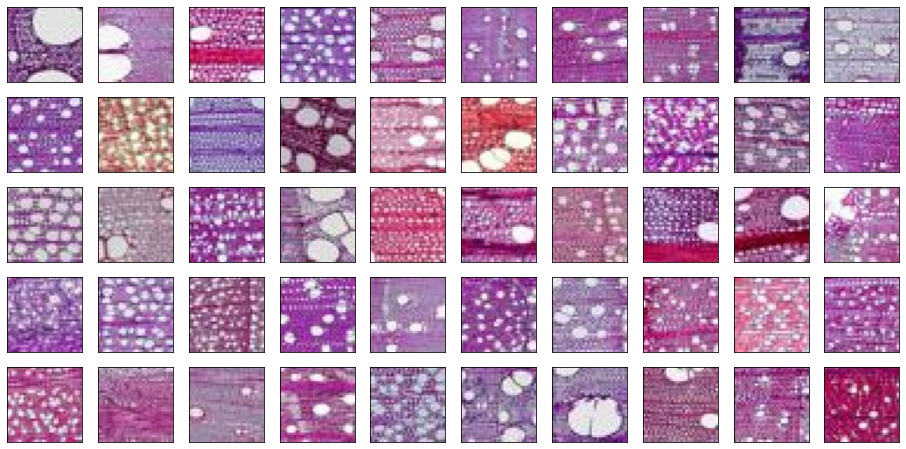

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

c = 0                                                    # subplot表示用のカウンター
plt.figure(figsize=(16, 8))                              # 表示するサイズを指定(何でもok)
for i in range(50):              # 160枚の訓練画像を表示
    c += 1
    plt.subplot(5,10,c)
    plt.tick_params(labelbottom=False, bottom=False)     #軸の消去
    plt.tick_params(labelleft=False, left=False)
    plt.imshow(test_data[i])
    
plt.savefig('img1.jpg')
plt.show()